In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#dfrpB_load = pd.read_csv("20181224_pihole.txt", delimiter=';')
#dfrpB_load.index=pd.to_datetime(dfrpB_load['date'])
#dfrpB = dfrpB_load.drop(columns=['date','drop'])
#dfrpB = dfrpB.shift(-5, freq=pd.DateOffset(weeks=1))
dfrpA_load = pd.read_csv("20181225_rpi.txt", delimiter=';' )
dfrpA_load.index=pd.to_datetime(dfrpA_load['date'])
dfrpA = dfrpA_load.drop(columns=['date'])
dfrpA = dfrpA.shift(-5, freq=pd.DateOffset(weeks=1))
dfAlux = dfrpA[['lux1','lux2']].copy()
dfAt = dfrpA[['temp']].copy()
dfAp = dfrpA[['pressure']].copy()
dfAa = dfrpA[['altitude']].copy()
#dfrpBlux = dfrpB[['lux1','lux2']].copy()
#dfrpBt = dfrpB[['t_dht','t_ds1820']].copy().fillna(0)
#dfB_l = dfrpBlux.corr()
#dfB_t = dfrpBt.corr()
dfA_l = dfrpAlux.corr()
#dfrpBlux['luxB'] = dfrpBlux.mean(1)
dfAlux['luxA'] = dfAlux.mean(1)
#dfrpBt['tempB'] = dfrpBt.mean(1)

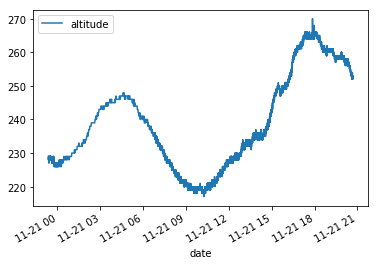

In [8]:
dfAa.plot()

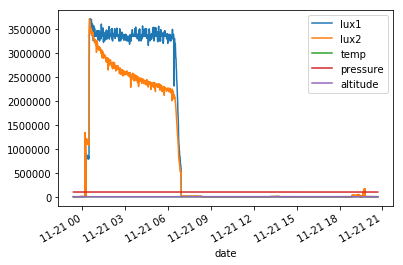

In [3]:
dfrpA.plot()

In [2]:
dfBluxN=dfrpBlux.copy()
dfBluxN=dfBluxN.drop(columns=['lux1','lux2'])
cols = dfBluxN.columns.tolist()
# cols = cols[2:]
dfBluxN[cols] = dfBluxN[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [3]:
dfAluxN=dfrpAlux.copy()
dfAluxN=dfAluxN.drop(columns=['lux1','lux2'])
cols = dfAluxN.columns.tolist()
# cols = cols[2:]
dfAluxN[cols] = dfAluxN[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [4]:
dfBtN=dfrpBt.copy()
dfBtN=dfBtN.drop(columns=['t_dht','t_ds1820'])
cols = dfBtN.columns.tolist()
# cols = cols[2:]
dfBtN[cols] = dfBtN[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [5]:
dfAtN=dfrpAt.copy()
cols = dfAtN.columns.tolist()
# cols = cols[2:]
dfAtN[cols] = dfAtN[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [6]:
dfAt_a, dfBt_a = dfAtN.align(dfBtN)
dfAt_a['tempB'] = dfBt_a['tempB']
dfT = dfAt_a.fillna(0)
dfT.columns = ['Temp. A', 'Temp. B']
finalT = dfT.loc[(dfT['Temp. B'] > 0) & (dfT['Temp. A'] > 0 )]
finalTC = finalT.corr() 

In [7]:
dfAlux_a, dfBlux_a = dfAluxN.align(dfBluxN)
dfAlux_a['luxB'] = dfBlux_a['luxB']
dfLux = dfAlux_a.fillna(0)
dfLux.columns = ['Lux A', 'Lux B']
finalLux = dfLux.loc[(dfLux['Lux B'] > 0) & (dfLux['Lux A'] > 0 )]
finalLuxC = finalLux.corr() 

In [8]:
df = dfT.copy() 
df['Lux A'] = dfLux['Lux A']
df['Lux B'] = dfLux['Lux B']
final = df.loc[(df['Lux B'] > 0) & (df['Lux A'] > 0)& (df['Temp. A'] > 0)& (df['Temp. B'] > 0)]

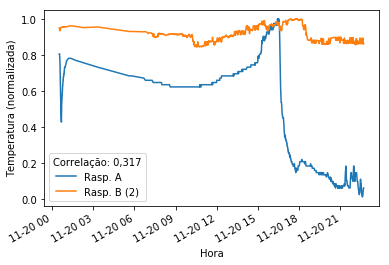

In [18]:
finalT.columns = ['Rasp. A', 'Rasp. B (2)']
plot = finalT.plot()
plot.set_xlabel("Hora")
plot.set_ylabel("Temperatura (normalizada)")
plot.legend(title="Correlação: 0,317")
fig = plot.get_figure()
fig.savefig("TempDiff.png", dpi=300)

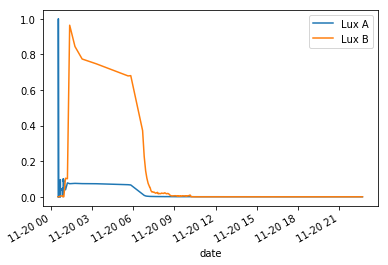

In [19]:
plot = finalLux.plot()

In [20]:
finalLuxC

,Lux A,Lux B
Lux A,1.000000,0.150505
Lux B,0.150505,1.000000


In [22]:
finalLux.head()

,Lux A,Lux B
date,,
2018-11-20 00:31:37,0.000118,0.000064
2018-11-20 00:31:39,0.000122,0.000065
2018-11-20 00:31:42,0.000129,0.000065
2018-11-20 00:31:44,0.000127,0.000064
2018-11-20 00:31:51,0.000121,0.000065


In [16]:
finalTC

,Temp. A,Temp. B
Temp. A,1.00000,0.31727
Temp. B,0.31727,1.00000
